In [1]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dept_a = np.array([12.5, 13.0, 11.8, 12.1, 13.4, 12.9, 13.2, 11.9, 12.6, 13.3, 12.0, 12.4, 13.1, 12.2, 12.7, 13.0, 12.8, 11.7, 12.3, 13.5, 12.5, 13.1, 12.6, 11.9, 13.2])
dept_b = np.array([14.2, 14.8, 15.0, 13.9, 14.5, 14.7, 14.0, 13.8, 14.4, 14.9, 15.2, 13.7, 14.3, 14.6, 15.1, 14.1, 14.8, 15.0, 14.2, 14.6, 14.3, 14.7, 15.0, 14.4, 14.1])

mean_a = np.mean(dept_a)
mean_b = np.mean(dept_b)

var_a = np.var(dept_a, ddof=1)
var_b = np.var(dept_b, ddof=1)

std_a = np.std(dept_a, ddof=1)
std_b = np.std(dept_b, ddof=1)

print(f"Dept A Mean: {mean_a:.2f}, Variance: {var_a:.2f}, Standard Deviation: {std_a:.2f}")
print(f"Dept B Mean: {mean_b:.2f}, Variance: {var_b:.2f}, Standard Deviation: {std_b:.2f}")


Dept A Mean: 12.63, Variance: 0.29, Standard Deviation: 0.54
Dept B Mean: 14.49, Variance: 0.18, Standard Deviation: 0.43


Dept B shows greater consistency in ticket completion time because it has a lower variance and standard deviation compared to Dept A. This means Dept B’s employees complete tickets more consistently around the average time.


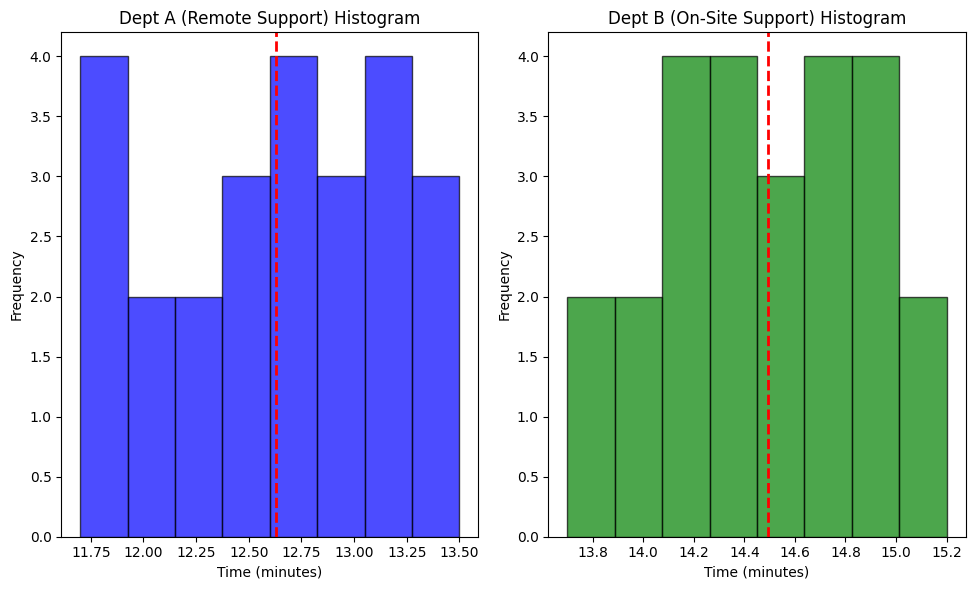

In [3]:
plt.figure(figsize=(10, 6))

# Dept A histogram
plt.subplot(1, 2, 1)
plt.hist(dept_a, bins=8, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(mean_a, color='red', linestyle='dashed', linewidth=2)
plt.title('Dept A (Remote Support) Histogram')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

# Dept B histogram
plt.subplot(1, 2, 2)
plt.hist(dept_b, bins=8, alpha=0.7, color='green', edgecolor='black')
plt.axvline(mean_b, color='red', linestyle='dashed', linewidth=2)
plt.title('Dept B (On-Site Support) Histogram')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Department A's distribution suggests faster but less predictable ticket completion times.

Department B's distribution indicates slower but more consistent performance.

This insight can guide management decisions depending on whether priority is on speed or consistency.

Estimated Probability (Time < 12) for Dept A: 0.1223


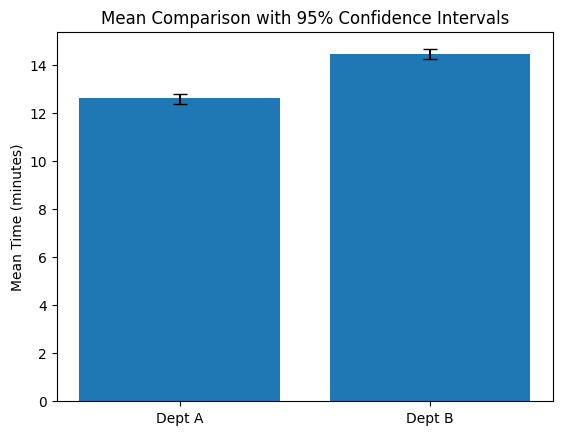

Pooled t-statistic: -13.5653
Degrees of Freedom: 48
P-value: 0.0000
Reject H0: True
Modified Dept B Mean: 17.49
Pooled t-statistic (modified): -35.3979
P-value (modified): 0.0000
Reject H0 with modified data: True


In [12]:
# 3. Monte Carlo Simulation
# Simulate 100,000 ticket completion times for Dept A
simulated_times_a = np.random.normal(mean_a, std_a, 100000)

# Estimate probability P(Time < 12)
probability_less_than_12 = np.mean(simulated_times_a < 12)

print(f"Estimated Probability (Time < 12) for Dept A: {probability_less_than_12:.4f}")

# 4. Hypothesis Testing (Pooled t-test)
# Null Hypothesis: H_0: mean_A = mean_B
# Alternative Hypothesis: H_1: mean_A ≠ mean_B

# Calculate pooled variance
pooled_variance = (((len(dept_a) - 1) * var_a + (len(dept_b) - 1) * var_b) /
                   (len(dept_a) + len(dept_b) - 2))

# Calculate the t-statistic
t_stat = (mean_a - mean_b) / np.sqrt(pooled_variance * (1 / len(dept_a) + 1 / len(dept_b)))

# Degrees of freedom
df = len(dept_a) + len(dept_b) - 2

# Import scipy.stats
from scipy import stats

# p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df))

# Decision at alpha = 0.05
alpha = 0.05
reject_h0 = p_value < alpha

# Mean comparison plot with 95% confidence intervals
ci_a = stats.t.interval(0.95, len(dept_a)-1, loc=mean_a, scale=std_a/np.sqrt(len(dept_a)))
ci_b = stats.t.interval(0.95, len(dept_b)-1, loc=mean_b, scale=std_b/np.sqrt(len(dept_b)))

plt.bar(['Dept A', 'Dept B'], [mean_a, mean_b], yerr=[[mean_a - ci_a[0]], [ci_b[1] - mean_b]], capsize=5)
plt.title('Mean Comparison with 95% Confidence Intervals')
plt.ylabel('Mean Time (minutes)')
plt.show()

print(f"Pooled t-statistic: {t_stat:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value:.4f}")
print(f"Reject H0: {reject_h0}")

# 5. Unique Personalization
# Modify Dept B's data by adding the last digit of student ID % 4
student_id_last_digit = 7  # replace with the last digit of your Student ID
mod_value = student_id_last_digit % 4

modified_dept_b = dept_b + mod_value

# Recalculate pooled t-test for modified Dept B
mean_b_modified = np.mean(modified_dept_b)
var_b_modified = np.var(modified_dept_b, ddof=1)
std_b_modified = np.std(modified_dept_b, ddof=1)

pooled_variance_modified = (((len(dept_a) - 1) * var_a + (len(modified_dept_b) - 1) * var_b_modified) /
                            (len(dept_a) + len(modified_dept_b) - 2))

t_stat_modified = (mean_a - mean_b_modified) / np.sqrt(pooled_variance_modified * (1 / len(dept_a) + 1 / len(modified_dept_b)))

p_value_modified = 2 * (1 - stats.t.cdf(np.abs(t_stat_modified), df))

reject_h0_modified = p_value_modified < alpha

print(f"Modified Dept B Mean: {mean_b_modified:.2f}")
print(f"Pooled t-statistic (modified): {t_stat_modified:.4f}")
print(f"P-value (modified): {p_value_modified:.4f}")
print(f"Reject H0 with modified data: {reject_h0_modified}")